In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [147]:
df = pd.read_csv('/content/sample_data/Clustering.csv')

In [148]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [60]:
X = df.loc[:, :'Malic_Acid'].values

In [61]:
print(X)

[[14.23  1.71]
 [13.2   1.78]
 [13.16  2.36]
 [14.37  1.95]
 [13.24  2.59]
 [14.2   1.76]
 [14.39  1.87]
 [14.06  2.15]
 [14.83  1.64]
 [13.86  1.35]
 [14.1   2.16]
 [14.12  1.48]
 [13.75  1.73]
 [14.75  1.73]
 [14.38  1.87]
 [13.63  1.81]
 [14.3   1.92]
 [13.83  1.57]
 [14.19  1.59]
 [13.64  3.1 ]
 [14.06  1.63]
 [12.93  3.8 ]
 [13.71  1.86]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.87  1.9 ]
 [14.02  1.68]
 [13.73  1.5 ]
 [13.58  1.66]
 [13.68  1.83]
 [13.76  1.53]
 [13.51  1.8 ]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.56  1.71]
 [13.41  3.84]
 [13.88  1.89]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.9   1.68]
 [14.1   2.02]
 [13.94  1.73]
 [13.05  1.73]
 [13.83  1.65]
 [13.82  1.75]
 [13.77  1.9 ]
 [13.74  1.67]
 [13.56  1.73]
 [14.22  1.7 ]
 [13.29  1.97]
 [13.72  1.43]
 [12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]
 [12.17  1.45]
 [12.37  1.21]
 [13.11  1

In [66]:
X

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

In [67]:
pd.DataFrame(X)

,0,1
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


Text(0, 0.5, 'WCSS')

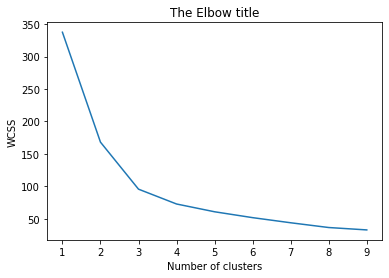

In [93]:
wcss=[]
for i in range(1,10):
  kmeans2 = KMeans(i)
  kmeans2.fit(X)
  wcss_iter = kmeans2.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [94]:
# SELECTING BEST K VALUE FROM WCSS GRAPH - IN THIS CASE IT IS 3 TO FIND THE ELBOW

In [ ]:
# NO OF FEATURES WHEN 3 ('Alcohol', 'Malic_Acid', 'Ash',)

In [119]:
from sklearn.preprocessing import StandardScaler


In [149]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [150]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [151]:
dfMain = pd.DataFrame(df)
print(dfMain)

           0         1         2         3         4         5         6   \
0    1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1    0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2    0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3    1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4    0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614 -1.424900   
174  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334 -1.284344   
175  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824 -1.344582   
176  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684 -1.354622   
177  1.395086  1.583165  1.365208  1.502943 -0.262708 -0.392751 -1.274305   

           7         8         9         10        11        12        13  

In [152]:
X = dfMain.iloc[:, :3].values

In [190]:
pd.DataFrame(X).head()

,0,1,2
0,1.518613,-0.562250,0.232053
1,0.246290,-0.499413,-0.827996
2,0.196879,0.021231,1.109334
3,1.691550,-0.346811,0.487926
4,0.295700,0.227694,1.840403


Text(0, 0.5, 'WCSS')

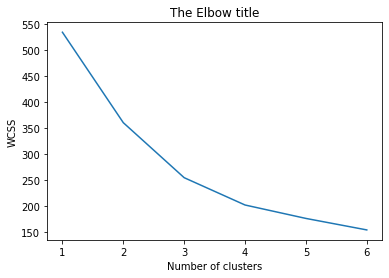

In [191]:
wcss=[]
for i in range(1,7):
  kmeans3 = KMeans(i)
  kmeans3.fit(X)
  wcss_iter = kmeans3.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [192]:
kmeans = KMeans( n_clusters=4, random_state=0 )

In [193]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [194]:
clusters_IN = kmeans.predict(X)

In [195]:
clusters_IN

array([1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 3, 1, 3, 1, 3,
       2, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 2, 3, 2, 3,
       0, 3, 2, 2, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       2, 3, 3, 0, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3,
       1, 3], dtype=int32)

In [196]:
dfMain['Clusters'] = clusters_IN

In [197]:
dfMain.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Clusters
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944,0


In [198]:
kmeans.cluster_centers_.shape
# 5 CLUSTERS AND 13 COLUMNS

(4, 3)

In [200]:
centers = kmeans.cluster_centers_
centers

array([[-0.80538941, -0.34928696,  1.0274043 ],
       [ 1.06907298, -0.47160342,  0.35461397],
       [-0.7372901 , -0.52794624, -0.99901406],
       [ 0.24099563,  1.51776395,  0.19201785]])

In [201]:
data1 = dfMain[dfMain.Clusters==0]
data2 = dfMain[dfMain.Clusters==1]
data3 = dfMain[dfMain.Clusters==2]
data4 = dfMain[dfMain.Clusters==3]


In [202]:

pd.DataFrame(data1).head()
#data1[11]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Clusters
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944,0
23,-0.186053,-0.660993,0.561033,-0.508966,-0.332922,0.296251,0.342082,-0.820719,-0.229346,-0.487978,0.581544,1.438311,0.853784,-1.213944,0
25,0.061000,-0.257044,3.119772,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.757038,0.830961,0.264653,-1.213944,0
36,0.345111,-0.625086,1.730742,-1.199622,0.720278,0.488531,0.653312,-0.176095,-0.404554,-0.198156,0.581544,0.237735,0.423878,-1.213944,0


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


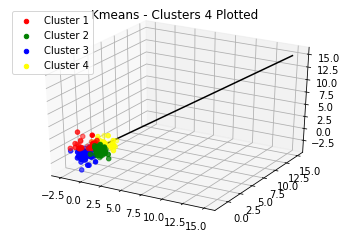

In [205]:

# plt.axes(projection='2d')
# plt.scatter(X[:, 0], X[:, 1], c=clusters_IN, s=20, cmap='rainbow')
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
# plt.show()


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1[0], data1[1], data1[2], c='red', label = 'Cluster 1')
kplot.scatter3D(data2[0], data2[1], data2[2],c ='green', label = 'Cluster 2')
kplot.scatter3D(data3[0], data3[1], data3[2],c ='blue', label = 'Cluster 3')
kplot.scatter3D(data4[0], data4[1], data4[2],c ='yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color = 'indigo' )
plt.legend()
plt.title("Kmeans - Clusters 4 Plotted")
plt.show()


In [14]:
df2 = df.loc[:, :'Proline']


In [15]:
type(df2)

pandas.core.frame.DataFrame

In [83]:
type(df)

pandas.core.frame.DataFrame

In [16]:

data_IN_cluster = df2.copy()

In [19]:
data_IN_cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [20]:
data_IN_cluster['Clusters'] = clusters_IN 

In [21]:
data_IN_cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [ ]:
# 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
#        'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
#        'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'

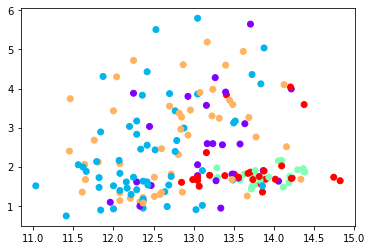

In [23]:

plt.scatter(data_IN_cluster['Alcohol'],
            data_IN_cluster['Malic_Acid'],
            c=data_IN_cluster['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

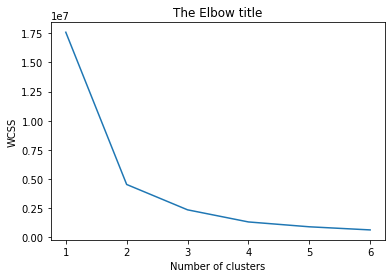

In [24]:
wcss=[]
for i in range(1,7):
  kmeans2 = KMeans(i)
  kmeans2.fit(X)
  wcss_iter = kmeans2.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')